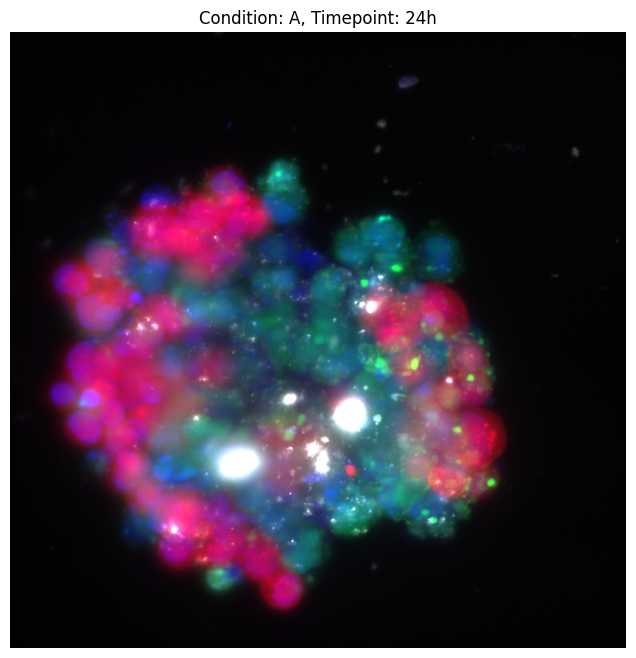

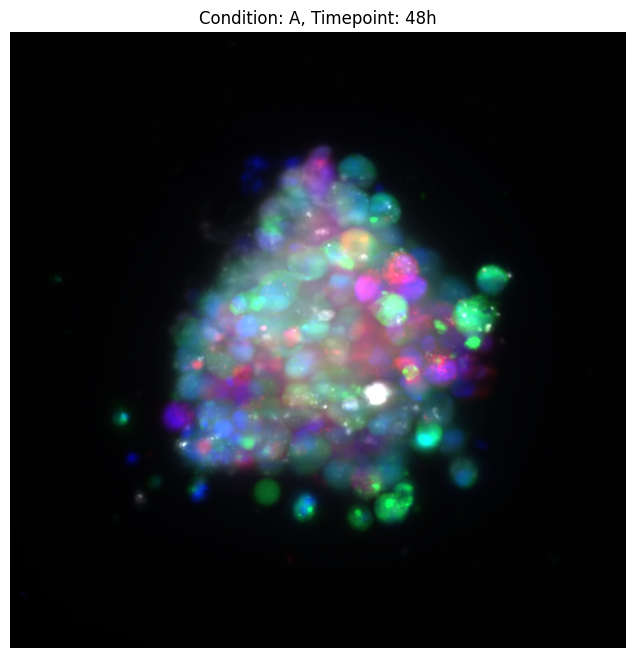

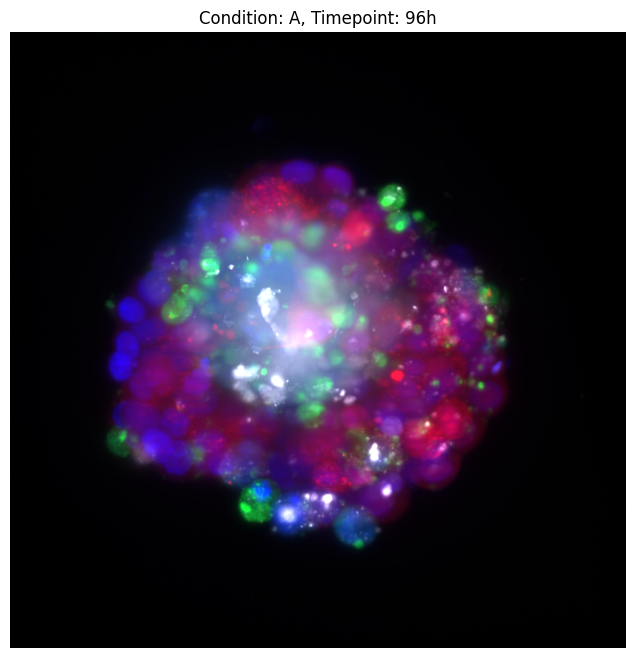

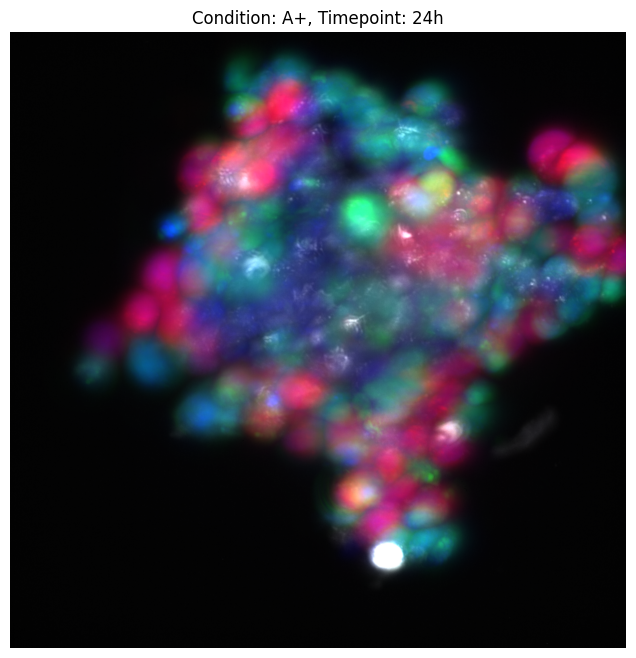

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

mip_folder = 'data/MIP'
conditions = ['A', 'A+', 'B']
timepoints = ['24h', '48h', '96h']

for condition in conditions:
    for timepoint in timepoints:
        # Assuming we want to display the first image of each set, e.g., Image001
        image_name = f'{condition}_{timepoint}_Image001_merge_all.tif'
        image_path = os.path.join(mip_folder, image_name)
        
        if os.path.exists(image_path):
            image = Image.open(image_path)
            
            plt.figure(figsize=(8, 8))
            plt.imshow(image)
            plt.title(f'Condition: {condition}, Timepoint: {timepoint}')
            plt.axis('off')
            plt.show()
        else:
            print(f'Image not found: {image_path}')

Total dataset size: 45
Train set size: 31
Validation set size: 6
Test set size: 8


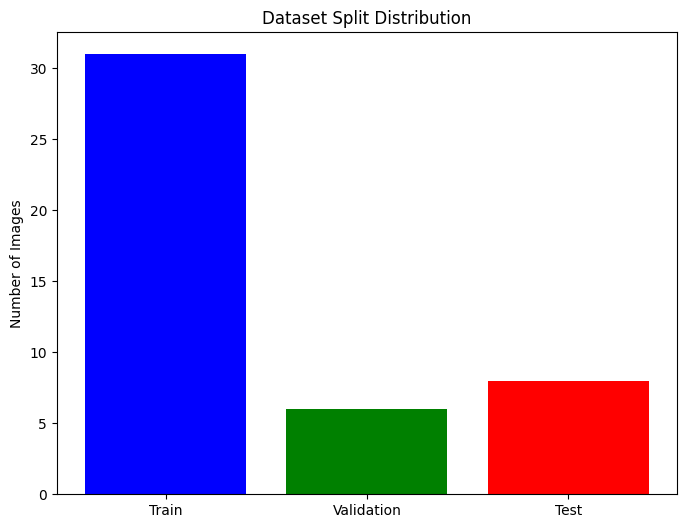

Dataset split distribution plot saved to /content/drive/MyDrive/DDLS-Course/FinalProject/dataset_split_distribution.png


In [2]:
import torch
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('/content/drive/MyDrive/DDLS-Course/FinalProject/step3_unet_model')
from dataset import SpheroidDataset

# Directories (adjust if your notebook is in a different location relative to data)
IMAGE_DIR = "/content/drive/MyDrive/DDLS-Course/FinalProject/data/processed/images"
MASK_DIR = "/content/drive/MyDrive/DDLS-Course/FinalProject/data/Segmentations/channels_cellpose"
 # Load the dataset
dataset = SpheroidDataset(IMAGE_DIR, MASK_DIR)
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size # Ensure all samples are covered
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Get actual lengths after random_split (due to potential rounding)
train_len = len(train_dataset)
val_len = len(val_dataset)
test_len = len(test_dataset)
print(f"Total dataset size: {total_size}")
print(f"Train set size: {train_len}")
print(f"Validation set size: {val_len}")
print(f"Test set size: {test_len}")
 # Create bar chart for split distribution
labels = ['Train', 'Validation', 'Test']
sizes = [train_len, val_len, test_len]
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['blue', 'green', 'red'])
plt.ylabel('Number of Images')
plt.title('Dataset Split Distribution')
plt.show() # Use plt.show() for notebooks
plt.savefig( "/content/drive/MyDrive/DDLS-Course/FinalProject/dataset_split_distribution.png")
plt.close()
print("Dataset split distribution plot saved to /content/drive/MyDrive/DDLS-Course/FinalProject/dataset_split_distribution.png")